In [9]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns
from sklearn import datasets
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import adjusted_rand_score, silhouette_score
import warnings
warnings.filterwarnings('ignore')

# Set style for better plots
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")


In [ ]:
df = pd.read_csv(r"C:\Users\NEEL\Downloads\Mallcustomers.csv")
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


--- Part 1: Data Loaded and Exploration ---

First 5 Rows:
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

Data Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)


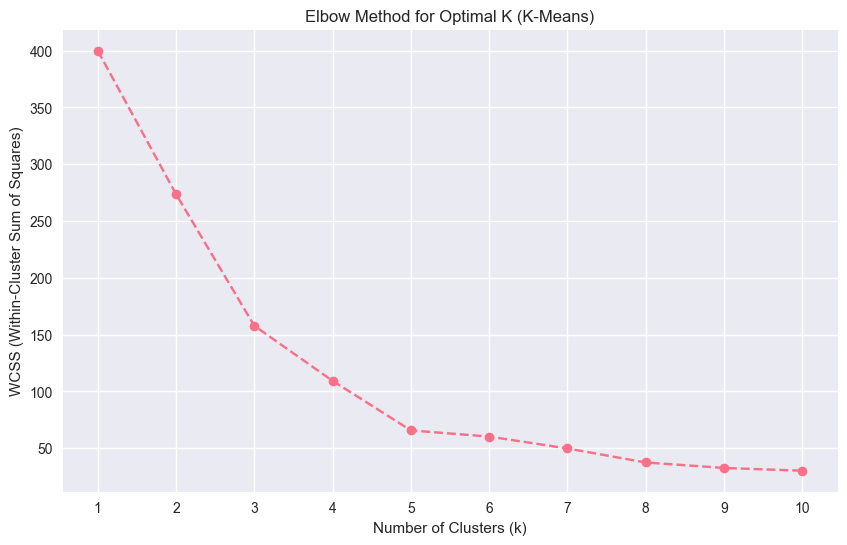


K-Means Clustering applied with K=5.


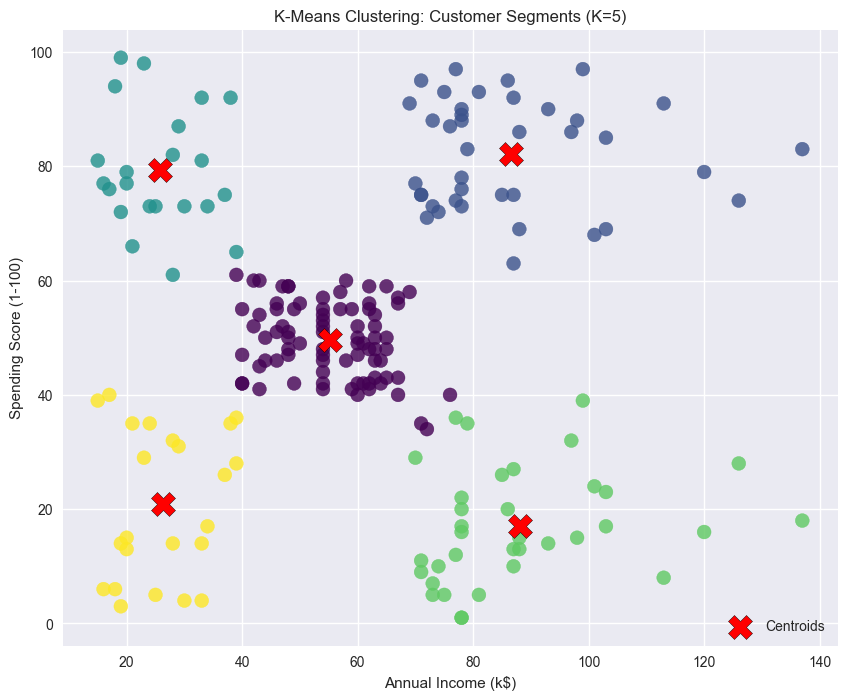


Part 3: Agglomerative Hierarchical Clustering


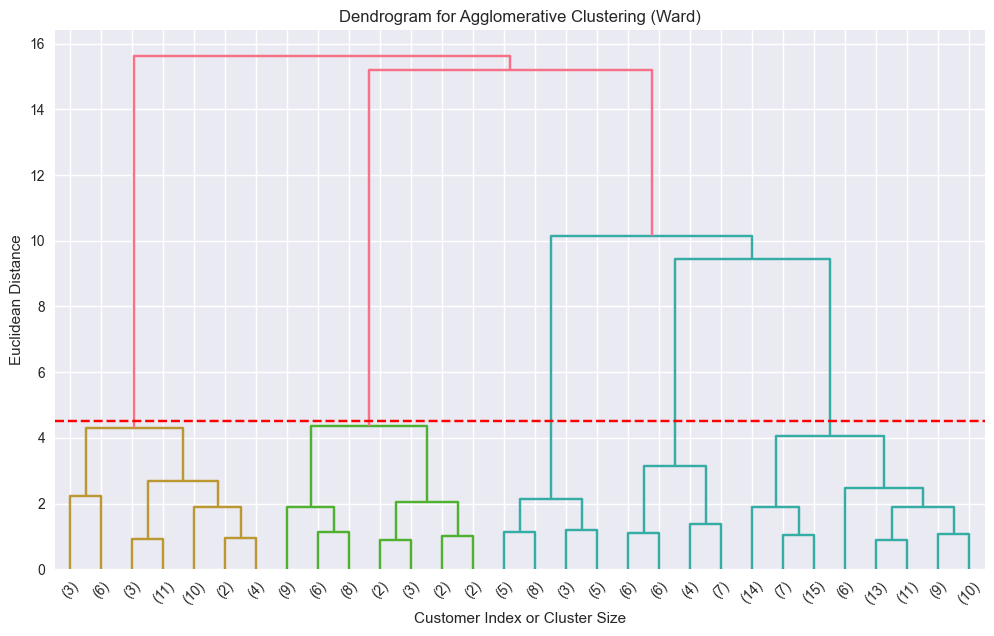


Hierarchical Clustering applied with K=5.


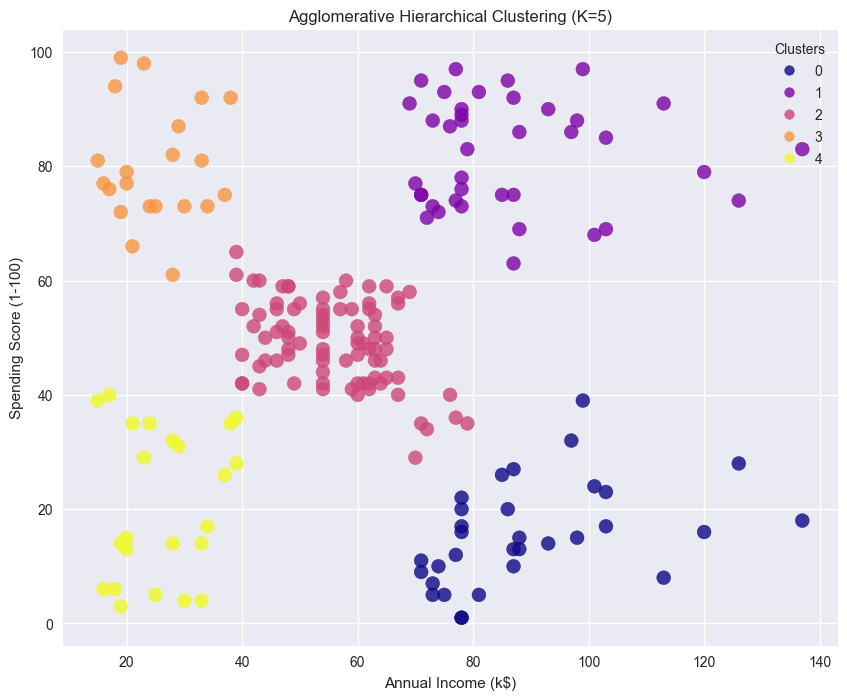


Part 4: DBSCAN Clustering


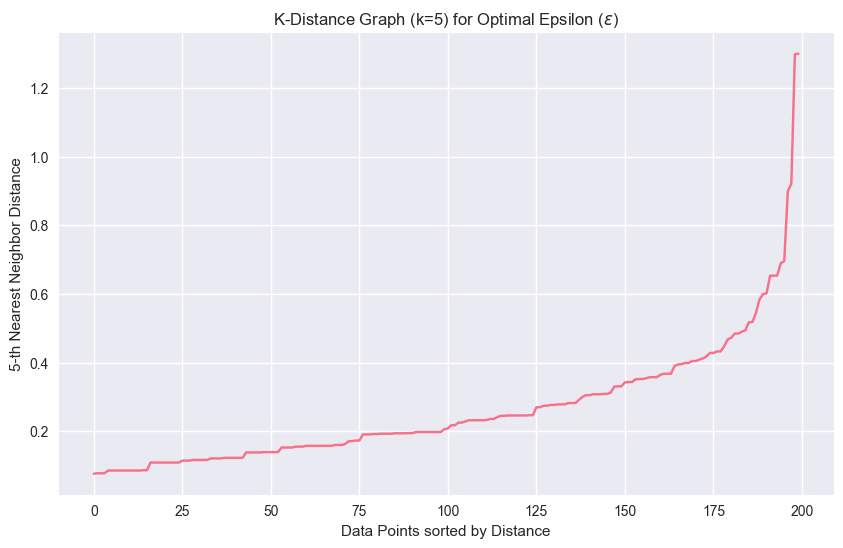


DBSCAN Clustering applied with $\epsilon$=0.4 and min_samples=5.
Cluster counts (-1 is noise/outliers):
DBSCAN_Cluster
 0    115
 2     32
 3     27
-1     15
 1     11
Name: count, dtype: int64


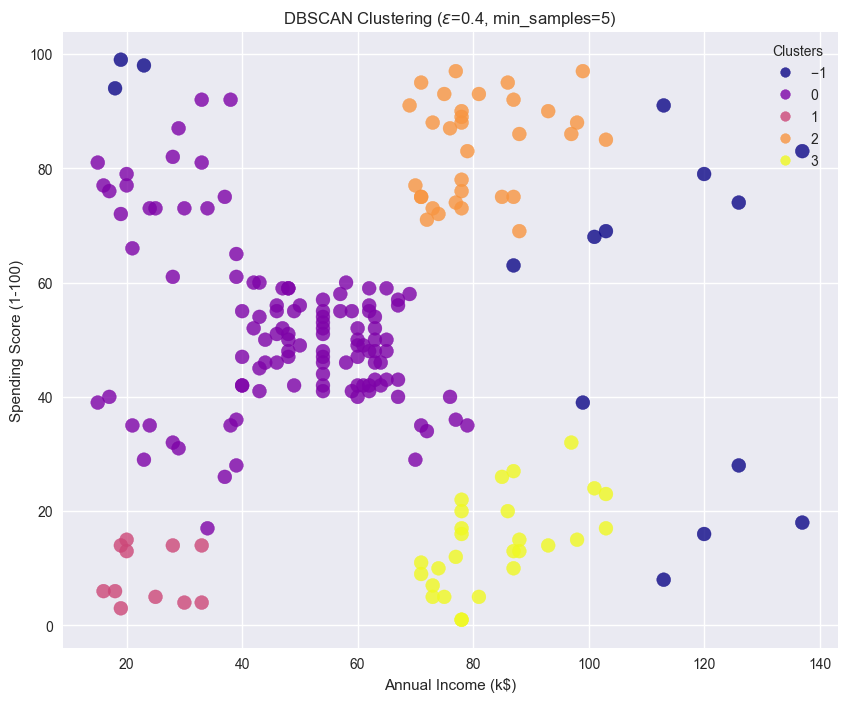

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.neighbors import NearestNeighbors

# --- Configuration ---
pd.set_option('display.max_columns', None)
RANDOM_STATE = 42
K_OPTIMAL = 5 # Determined from Elbow Method and Dendrogram analysis

# ==============================================================================
# Part 1: Data Exploration and Preprocessing
# ==============================================================================

# 1. Load the Data
df_mall = pd.read_csv(r"C:\Users\NEEL\Downloads\Mallcustomers.csv")
print("--- Part 1: Data Loaded and Exploration ---")

# 2. Explore the Dataset (using standard print methods)
print("\nFirst 5 Rows:")
print(df_mall.head())

print("\nData Information:")
df_mall.info()

print("\nDescriptive Statistics:")
print(df_mall.describe())

# 3. Data Selection and Feature Scaling
# Select Annual Income and Spending Score for clustering
X = df_mall[['Annual Income (k$)', 'Spending Score (1-100)']]

# Scale the features (crucial for distance-based algorithms like K-Means, HAC, DBSCAN)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print("\nFeatures scaled successfully.")
print(f"Features selected for clustering (Shape: {X.shape})")


# ==============================================================================
# Part 2: K-Means Clustering
# ==============================================================================
print("\n========================================================")
print("Part 2: K-Means Clustering")
print("========================================================")

# 1. Determine Optimal K using the Elbow Method (WCSS)
wcss = []
for i in range(1, 11):
    kmeans_model = KMeans(n_clusters=i, init='k-means++', random_state=RANDOM_STATE, n_init='auto')
    kmeans_model.fit(X_scaled)
    wcss.append(kmeans_model.inertia_)

# Plot the Elbow Method results
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal K (K-Means)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()
# Based on the plot, K_OPTIMAL = 5 is chosen.

# 2. Implement K-Means with optimal K
kmeans = KMeans(n_clusters=K_OPTIMAL, init='k-means++', random_state=RANDOM_STATE, n_init='auto')
y_kmeans = kmeans.fit_predict(X_scaled)

# Add cluster labels to the original data
df_mall['KMeans_Cluster'] = y_kmeans

# Calculate and inverse transform centroids for interpretation
centroids_scaled = kmeans.cluster_centers_
centroids_original = scaler.inverse_transform(centroids_scaled)
print(f"\nK-Means Clustering applied with K={K_OPTIMAL}.")

# 3. Visualize K-Means Clusters
plt.figure(figsize=(10, 8))
scatter = plt.scatter(df_mall['Annual Income (k$)'], df_mall['Spending Score (1-100)'],
                      c=df_mall['KMeans_Cluster'], cmap='viridis', s=100, alpha=0.8)
plt.scatter(centroids_original[:, 0], centroids_original[:, 1],
            s=300, c='red', marker='X', label='Centroids', edgecolor='black')
plt.title(f'K-Means Clustering: Customer Segments (K={K_OPTIMAL})')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


# ==============================================================================
# Part 3: Agglomerative Hierarchical Clustering (HAC)
# ==============================================================================
print("\n========================================================")
print("Part 3: Agglomerative Hierarchical Clustering")
print("========================================================")

# 1. Determine Optimal K using the Dendrogram
linked = linkage(X_scaled, method='ward') # Ward linkage minimizes the variance
plt.figure(figsize=(12, 7))
dendrogram(
    linked,
    orientation='top',
    truncate_mode='lastp',
    p=30,  # Show only the last 30 merges
    show_leaf_counts=True,
)
plt.title('Dendrogram for Agglomerative Clustering (Ward)')
plt.xlabel('Customer Index or Cluster Size')
plt.ylabel('Euclidean Distance')
plt.axhline(y=4.5, color='r', linestyle='--') # Visual cutoff line indicating K=5
plt.show()
# Based on the Dendrogram, K_OPTIMAL = 5 is also chosen.

# 2. Implement HAC with optimal K
hc = AgglomerativeClustering(n_clusters=K_OPTIMAL, metric='euclidean', linkage='ward')
y_hc = hc.fit_predict(X_scaled)
df_mall['HC_Cluster'] = y_hc
print(f"\nHierarchical Clustering applied with K={K_OPTIMAL}.")

# 3. Visualize HAC Clusters
plt.figure(figsize=(10, 8))
scatter = plt.scatter(df_mall['Annual Income (k$)'], df_mall['Spending Score (1-100)'],
                      c=df_mall['HC_Cluster'], cmap='plasma', s=100, alpha=0.8)
plt.title(f'Agglomerative Hierarchical Clustering (K={K_OPTIMAL})')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(*scatter.legend_elements(), title="Clusters", loc="upper right")
plt.grid(True)
plt.show()


# ==============================================================================
# Part 4: DBSCAN Clustering
# ==============================================================================
print("\n========================================================")
print("Part 4: DBSCAN Clustering")
print("========================================================")

# 1. Determine Optimal Epsilon (ε) using the K-distance plot
MIN_SAMPLES = 5 # Typical choice for min_samples

neigh = NearestNeighbors(n_neighbors=MIN_SAMPLES)
nbrs = neigh.fit(X_scaled)
distances, indices = nbrs.kneighbors(X_scaled)

# Get the distance to the 5th nearest neighbor
k_distances = np.sort(distances[:, MIN_SAMPLES-1], axis=0)

# Plot the K-distance graph
plt.figure(figsize=(10, 6))
plt.plot(k_distances)
plt.title(f'K-Distance Graph (k={MIN_SAMPLES}) for Optimal Epsilon ($\epsilon$)')
plt.xlabel('Data Points sorted by Distance')
plt.ylabel(f'{MIN_SAMPLES}-th Nearest Neighbor Distance')
plt.grid(True)
plt.show()
# Based on the elbow in the plot, EPSILON = 0.4 is chosen.

# 2. Implement DBSCAN
EPSILON = 0.4
dbscan = DBSCAN(eps=EPSILON, min_samples=MIN_SAMPLES)
y_dbscan = dbscan.fit_predict(X_scaled)
df_mall['DBSCAN_Cluster'] = y_dbscan
print(f"\nDBSCAN Clustering applied with $\epsilon$={EPSILON} and min_samples={MIN_SAMPLES}.")
print("Cluster counts (-1 is noise/outliers):")
print(df_mall['DBSCAN_Cluster'].value_counts())

# 3. Visualize DBSCAN Clusters
plt.figure(figsize=(10, 8))
scatter = plt.scatter(df_mall['Annual Income (k$)'], df_mall['Spending Score (1-100)'],
                      c=df_mall['DBSCAN_Cluster'], cmap='plasma', s=100, alpha=0.8)
plt.title(f'DBSCAN Clustering ($\epsilon$={EPSILON}, min_samples={MIN_SAMPLES})')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(*scatter.legend_elements(), title="Clusters", loc="upper right")
plt.grid(True)
plt.show()

--- Data Preprocessing Complete (Features Scaled) ---

--- 1. Elbow Method to Find Optimal k ---


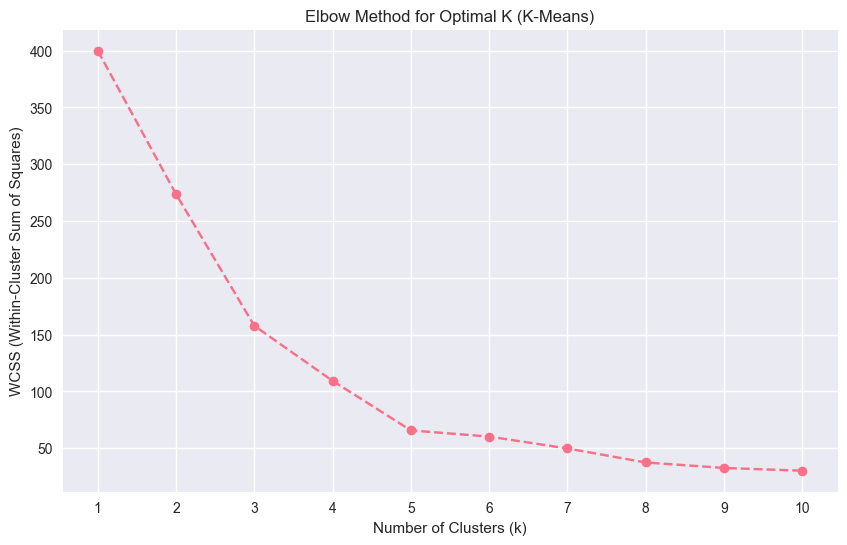

WCSS values for k=1 to 10: [399.9999999999999, 273.6688866264201, 157.70400815035947, 109.22822707921347, 65.56840815571681, 60.13287487193422, 49.66824483736798, 37.319122878338824, 32.49508119910091, 30.059322694042212]

--- 2. Applying K-Means with Optimal k = 5 ---

--- 3. Visualizing K-Means Results ---


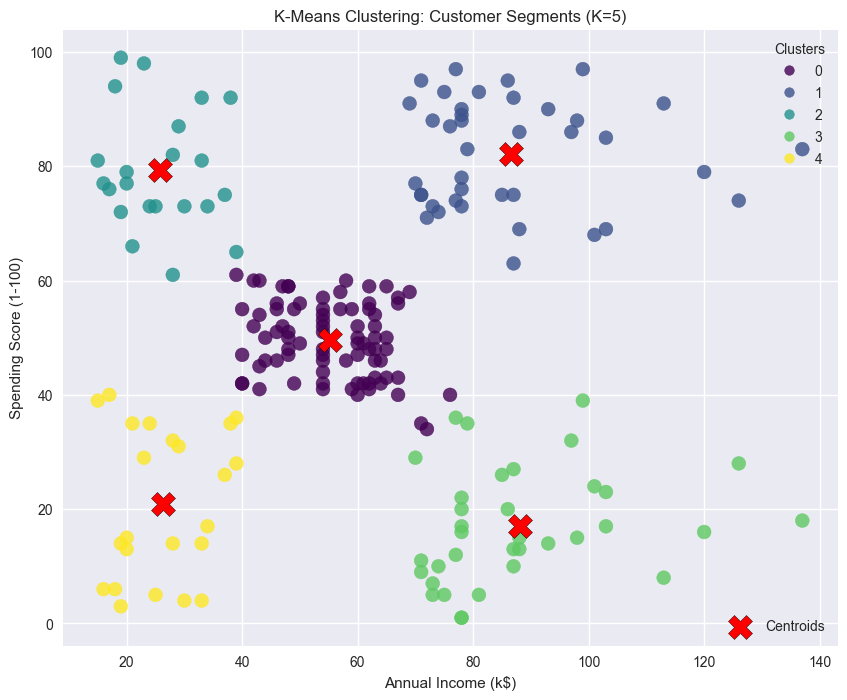


K-Means Visualization Complete.


In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# --- Configuration ---
RANDOM_STATE = 42

# 1. Load Data, Select Features, and Scale (Preliminary steps for K-Means)
df_mall = pd.read_csv(r"C:\Users\NEEL\Downloads\Mallcustomers.csv")
X = df_mall[['Annual Income (k$)', 'Spending Score (1-100)']]

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("--- Data Preprocessing Complete (Features Scaled) ---")


# ==============================================================================
# 1. Finding the Optimal Number of Clusters (k) using the Elbow Method
# ==============================================================================
print("\n--- 1. Elbow Method to Find Optimal k ---")

# Iterate through a range of k values (1 to 10)
wcss = []
for i in range(1, 11):
    # Initialize KMeans model
    kmeans_model = KMeans(n_clusters=i, init='k-means++', random_state=RANDOM_STATE, n_init='auto')
    # Fit the model to the scaled data
    kmeans_model.fit(X_scaled)
    # Calculate WCSS (inertia_)
    wcss.append(kmeans_model.inertia_)

# Plot the WCSS values against k
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal K (K-Means)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

# Based on the elbow point (visually determined in the previous step), k=5 is optimal.
K_OPTIMAL = 5
print(f"WCSS values for k=1 to 10: {wcss}")


# ==============================================================================
# 2. Applying K-Means
# ==============================================================================
print(f"\n--- 2. Applying K-Means with Optimal k = {K_OPTIMAL} ---")

# Initialize and fit the KMeans model with the optimal k
kmeans = KMeans(n_clusters=K_OPTIMAL, init='k-means++', random_state=RANDOM_STATE, n_init='auto')
# Fit the model and predict the cluster labels
y_kmeans = kmeans.fit_predict(X_scaled)

# Get the cluster labels
df_mall['KMeans_Cluster'] = y_kmeans

# Calculate and inverse transform centroids for visualization
centroids_scaled = kmeans.cluster_centers_
centroids_original = scaler.inverse_transform(centroids_scaled)


# ==============================================================================
# 3. Visualize K-Means Results
# ==============================================================================
print("\n--- 3. Visualizing K-Means Results ---")

plt.figure(figsize=(10, 8))
# Scatter plot of data points, colored by cluster
scatter = plt.scatter(X['Annual Income (k$)'], X['Spending Score (1-100)'],
                      c=df_mall['KMeans_Cluster'], cmap='viridis', s=100, alpha=0.8)

# Plot the centroids
plt.scatter(centroids_original[:, 0], centroids_original[:, 1],
            s=300, c='red', marker='X', label='Centroids', edgecolor='black')

plt.title(f'K-Means Clustering: Customer Segments (K={K_OPTIMAL})')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
# Create a legend for clusters and centroids
legend1 = plt.legend(*scatter.legend_elements(), title="Clusters", loc="upper right")
plt.gca().add_artist(legend1)
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

print("\nK-Means Visualization Complete.")

--- Data Preprocessing Complete (Features Scaled) ---

--- 1. Creating Dendrogram to Find Optimal k ---


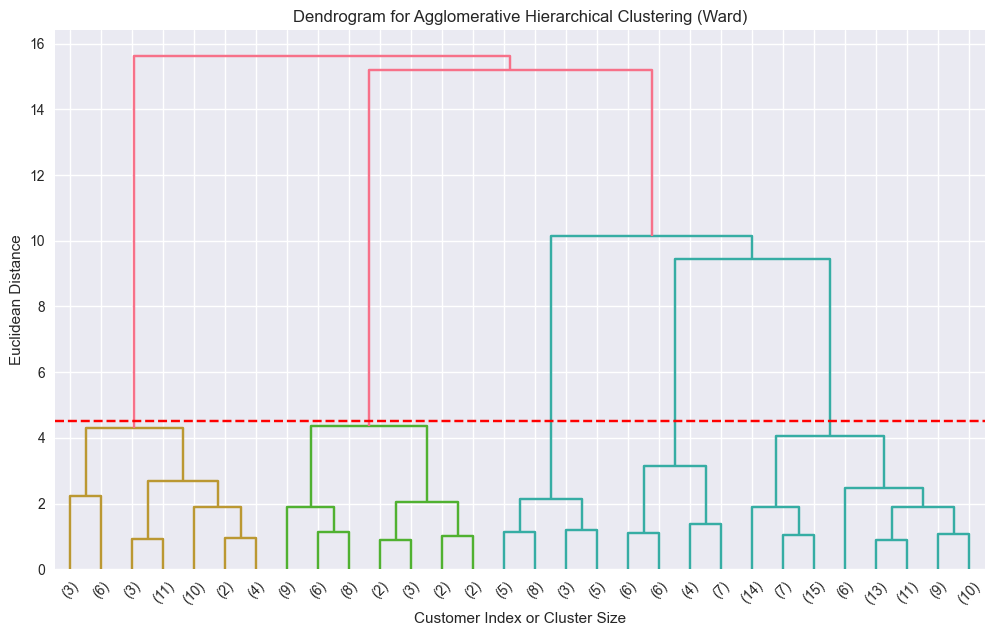


--- 2. Applying Hierarchical Clustering with Optimal k = 5 ---
Hierarchical Clustering applied with K=5.

--- 3. Visualizing Hierarchical Clustering Results ---


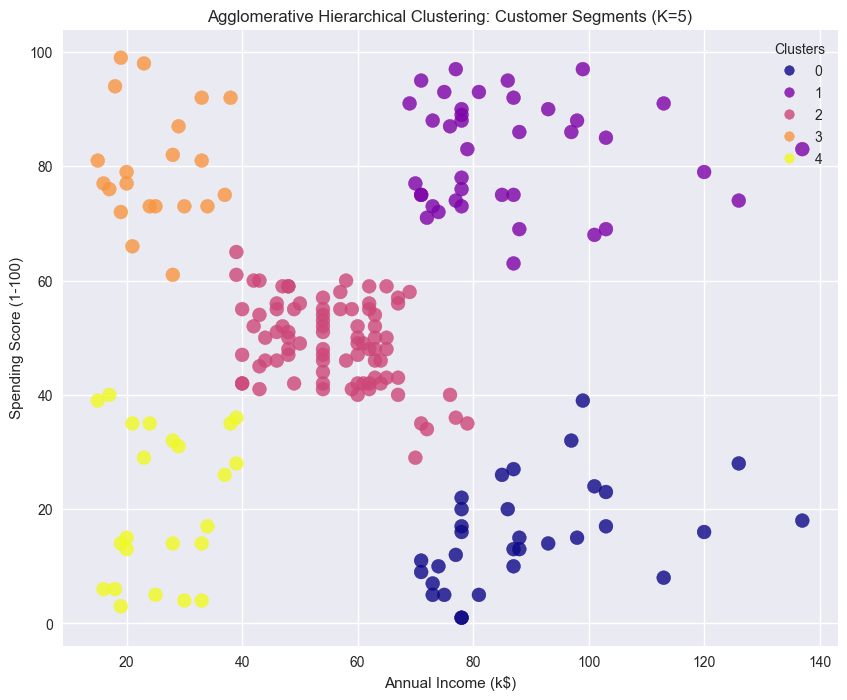


Hierarchical Clustering Visualization Complete.


In [22]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
import numpy as np

# --- Configuration ---
K_OPTIMAL = 5 # Set based on previous K-Means analysis, but confirmed by Dendrogram

# 1. Load Data, Select Features, and Scale (Preliminary steps for HAC)
df_mall = pd.read_csv(r"C:\Users\NEEL\Downloads\Mallcustomers.csv")
X = df_mall[['Annual Income (k$)', 'Spending Score (1-100)']]

# Scale the features (critical for HAC)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("--- Data Preprocessing Complete (Features Scaled) ---")


# ==============================================================================
# 1. Creating a Dendrogram
# ==============================================================================
print("\n--- 1. Creating Dendrogram to Find Optimal k ---")

# Generate the linkage matrix using the 'ward' method on the scaled data
linked = linkage(X_scaled, method='ward')

# Plot the Dendrogram
plt.figure(figsize=(12, 7))
dendrogram(
    linked,
    orientation='top',
    truncate_mode='lastp',
    p=30,  # Show only the last 30 merges
    show_leaf_counts=True,
)

plt.title('Dendrogram for Agglomerative Hierarchical Clustering (Ward)')
plt.xlabel('Customer Index or Cluster Size')
plt.ylabel('Euclidean Distance')
# Add a horizontal line to visualize the optimal cut
plt.axhline(y=4.5, color='r', linestyle='--')
plt.show()

# Based on the cut (the largest vertical distance without crossing horizontal lines),
# the red line at 4.5 crosses 5 vertical lines, indicating K_OPTIMAL = 5.


# ==============================================================================
# 2. Applying Hierarchical Clustering
# ==============================================================================
print(f"\n--- 2. Applying Hierarchical Clustering with Optimal k = {K_OPTIMAL} ---")

# Initialize and fit the AgglomerativeClustering model
hc = AgglomerativeClustering(n_clusters=K_OPTIMAL, metric='euclidean', linkage='ward')

# Fit the model and predict the cluster labels
y_hc = hc.fit_predict(X_scaled)

# Get the cluster labels
df_mall['HC_Cluster'] = y_hc
print(f"Hierarchical Clustering applied with K={K_OPTIMAL}.")


# ==============================================================================
# 3. Visualize Hierarchical Clustering Results
# ==============================================================================
print("\n--- 3. Visualizing Hierarchical Clustering Results ---")

plt.figure(figsize=(10, 8))
# Scatter plot of data points, colored by cluster
scatter = plt.scatter(X['Annual Income (k$)'], X['Spending Score (1-100)'],
                      c=df_mall['HC_Cluster'], cmap='plasma', s=100, alpha=0.8)

plt.title(f'Agglomerative Hierarchical Clustering: Customer Segments (K={K_OPTIMAL})')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
# Create a legend for clusters
plt.legend(*scatter.legend_elements(), title="Clusters", loc="upper right")
plt.grid(True)
plt.show()

print("\nHierarchical Clustering Visualization Complete.")

--- Data Preprocessing Complete (Features Scaled) ---

--- 1. Applying DBSCAN with $\epsilon$=0.4 and min_samples=5 ---
Cluster counts (-1 indicates noise/outliers):
DBSCAN_Cluster
-1     15
 0    115
 1     11
 2     32
 3     27
Name: count, dtype: int64

--- 2. Visualizing DBSCAN Results ---


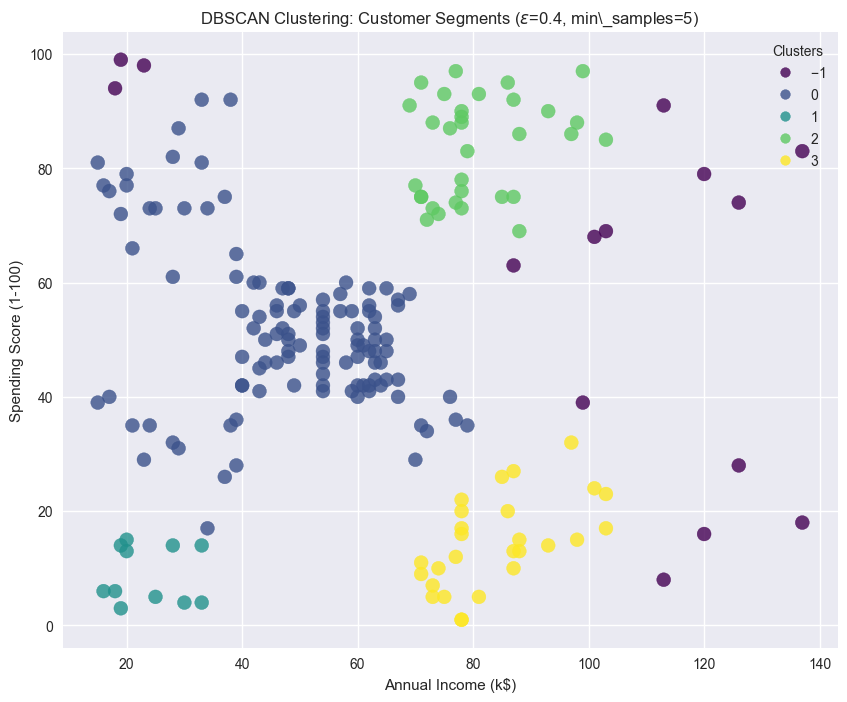


DBSCAN Visualization Complete.


In [23]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import numpy as np

# --- Configuration ---
EPSILON = 0.4  # Optimal epsilon determined from the K-distance plot on scaled data
MIN_SAMPLES = 5 

# 1. Load Data, Select Features, and Scale (Preliminary steps for DBSCAN)
df_mall = pd.read_csv(r"C:\Users\NEEL\Downloads\Mallcustomers.csv")
X = df_mall[['Annual Income (k$)', 'Spending Score (1-100)']]

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("--- Data Preprocessing Complete (Features Scaled) ---")


# ==============================================================================
# 1. Applying DBSCAN
# ==============================================================================
print(f"\n--- 1. Applying DBSCAN with $\epsilon$={EPSILON} and min_samples={MIN_SAMPLES} ---")

# Initialize and fit the DBSCAN model
dbscan = DBSCAN(eps=EPSILON, min_samples=MIN_SAMPLES)

# Fit the model and predict the cluster labels
y_dbscan = dbscan.fit_predict(X_scaled)

# Get the cluster labels
df_mall['DBSCAN_Cluster'] = y_dbscan

print("Cluster counts (-1 indicates noise/outliers):")
print(df_mall['DBSCAN_Cluster'].value_counts().sort_index())


# ==============================================================================
# 2. Visualize DBSCAN Results
# ==============================================================================
print("\n--- 2. Visualizing DBSCAN Results ---")

plt.figure(figsize=(10, 8))

# Scatter plot of data points, colored by cluster label
scatter = plt.scatter(X['Annual Income (k$)'], X['Spending Score (1-100)'],
                      c=df_mall['DBSCAN_Cluster'], cmap='viridis', s=100, alpha=0.8)

plt.title(f'DBSCAN Clustering: Customer Segments ($\epsilon$={EPSILON}, min\_samples={MIN_SAMPLES})')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
# Create a legend for clusters, including -1 (Noise)
plt.legend(*scatter.legend_elements(), title="Clusters", loc="upper right")
plt.grid(True)
plt.show()

print("\nDBSCAN Visualization Complete.")

--- Part 1: Data Exploration and Preprocessing ---

First 5 Rows:
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

Data Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), obj

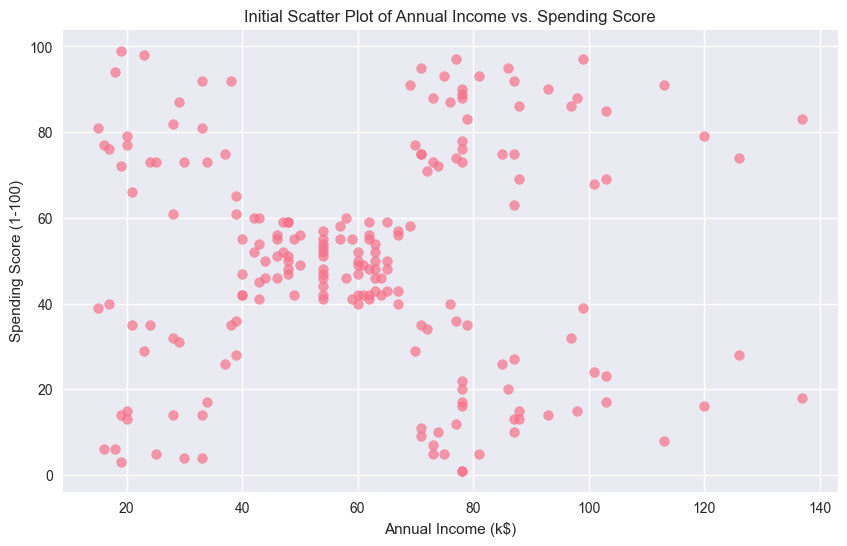


Features scaled successfully for clustering.

Part 2: K-Means Clustering


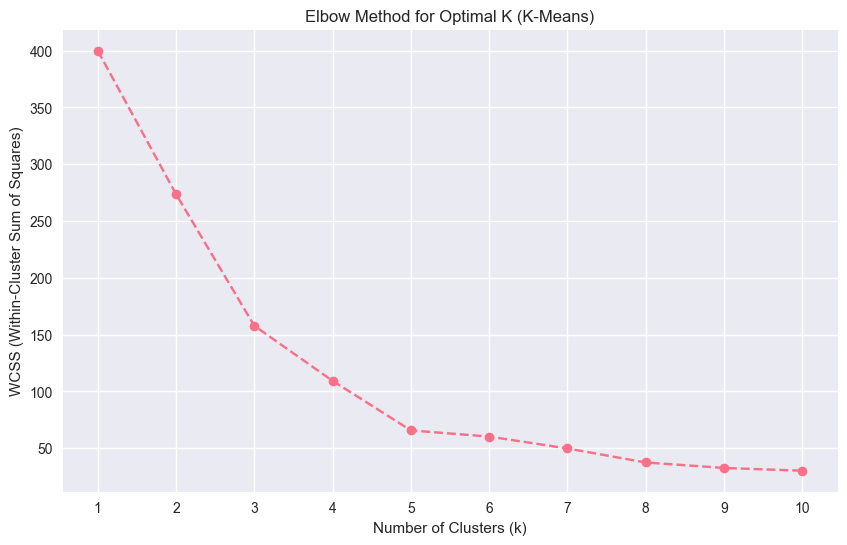

Optimal K determined to be 5 based on the elbow point.


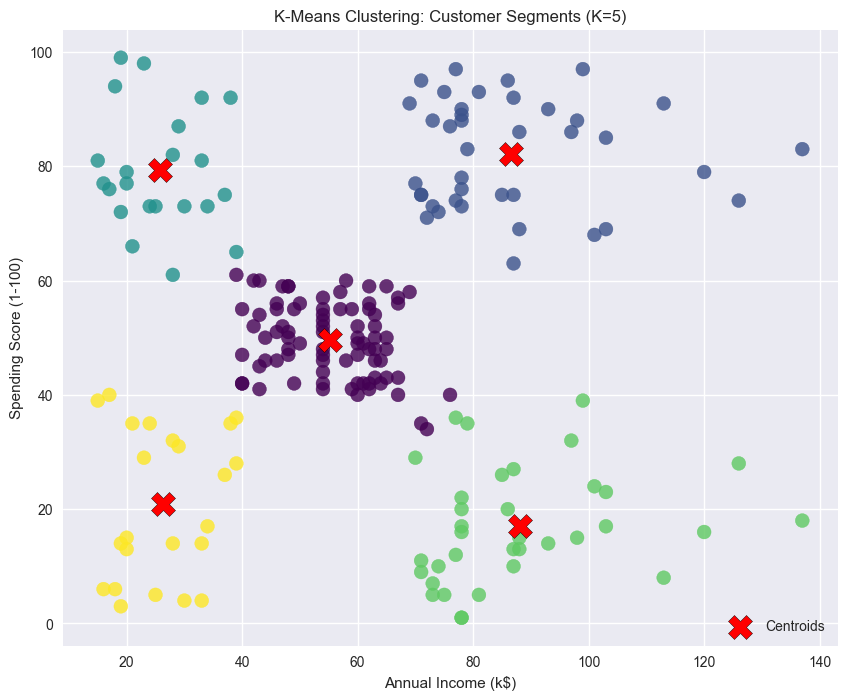

K-Means clustering and visualization complete.

Part 3: Agglomerative Hierarchical Clustering


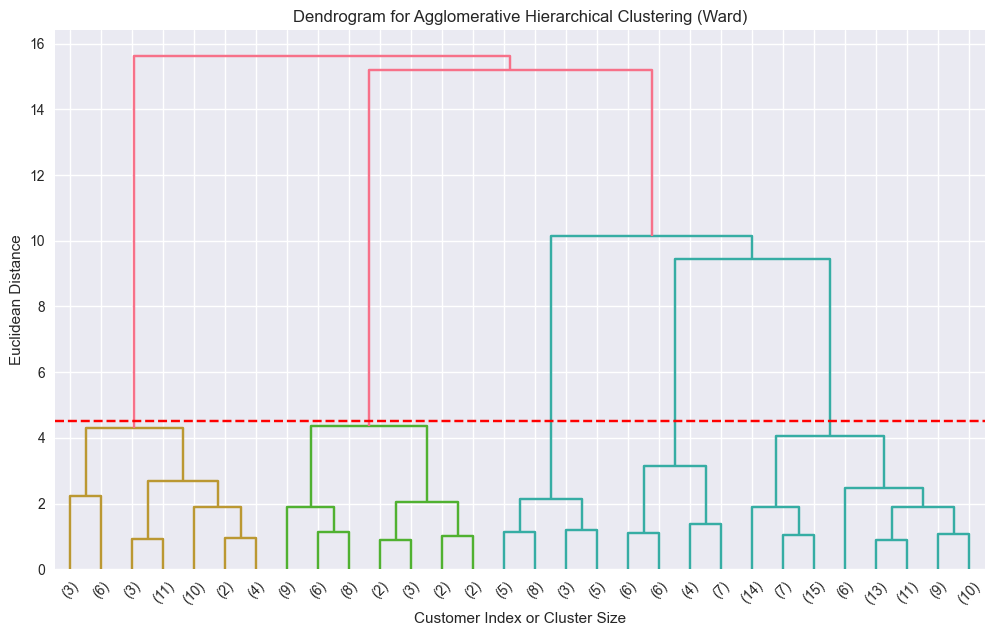

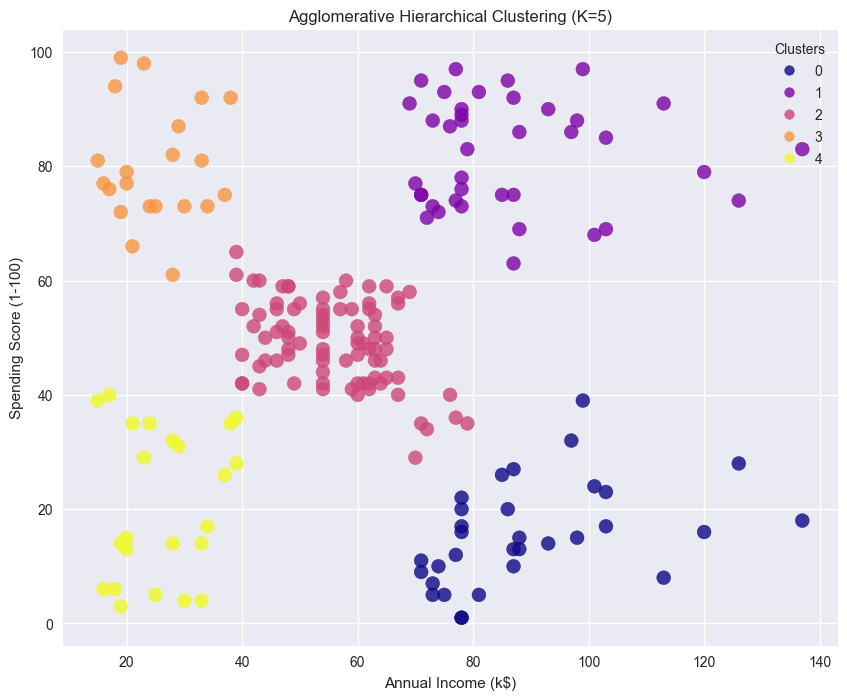

Hierarchical clustering and visualization complete.

Part 4: DBSCAN Clustering


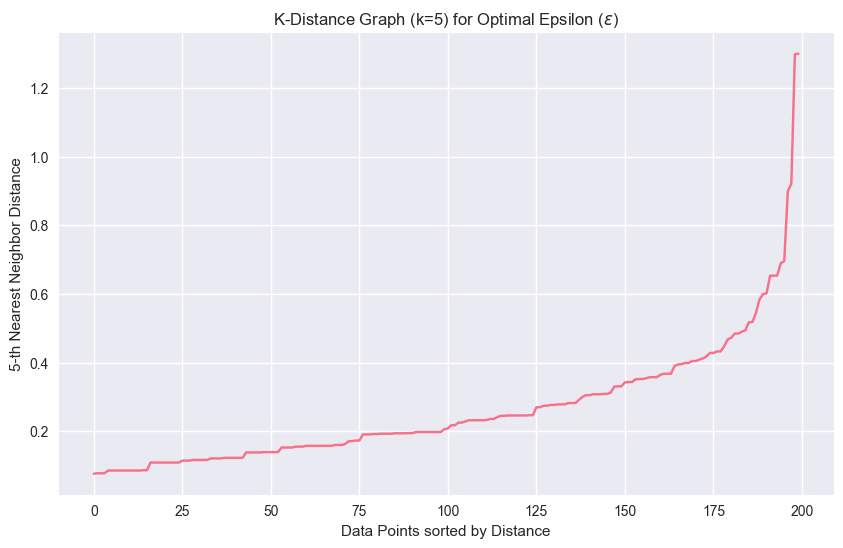


DBSCAN Clustering applied with $\epsilon$=0.4 and min_samples=5.
Cluster counts (-1 is noise/outliers):
DBSCAN_Cluster
-1     15
 0    115
 1     11
 2     32
 3     27
Name: count, dtype: int64


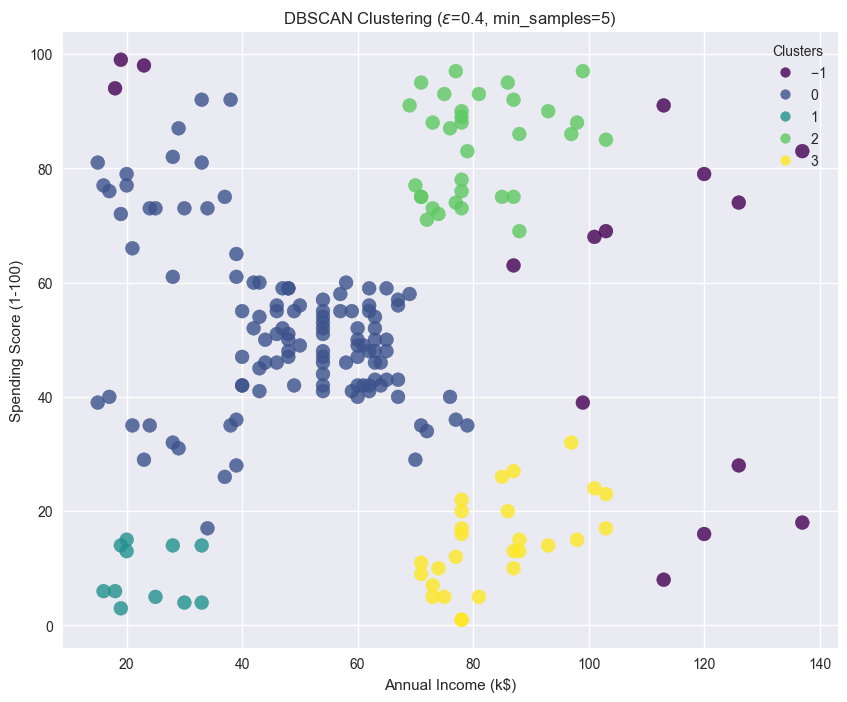

DBSCAN clustering and visualization complete.


In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.neighbors import NearestNeighbors

# --- Configuration ---
RANDOM_STATE = 42
K_OPTIMAL = 5  # Optimal K determined by Elbow and Dendrogram analysis

# ==============================================================================
# Part 1: Data Exploration and Preprocessing
# ==============================================================================
print("--- Part 1: Data Exploration and Preprocessing ---")

# 1. Load the Data
df_mall = pd.read_csv(r"C:\Users\NEEL\Downloads\Mallcustomers.csv")

# 2. Explore the Dataset
print("\nFirst 5 Rows:")
print(df_mall.head())

print("\nData Information:")
df_mall.info()

print("\nDescriptive Statistics:")
print(df_mall.describe())

# 3. Data Selection and 4. Initial Visualization
# Select Annual Income and Spending Score for clustering
X = df_mall[['Annual Income (k$)', 'Spending Score (1-100)']]

# Create initial visualization
plt.figure(figsize=(10, 6))
plt.scatter(X['Annual Income (k$)'], X['Spending Score (1-100)'], s=50, alpha=0.7)
plt.title('Initial Scatter Plot of Annual Income vs. Spending Score')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.grid(True)
plt.show()

# 4. Feature Scaling (Crucial for distance-based algorithms)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print("\nFeatures scaled successfully for clustering.")


# ==============================================================================
# Part 2: K-Means Clustering
# ==============================================================================
print("\n========================================================")
print("Part 2: K-Means Clustering")
print("========================================================")

# 1. Finding the Optimal Number of Clusters (k) using the Elbow Method
wcss = []
for i in range(1, 11):
    kmeans_model = KMeans(n_clusters=i, init='k-means++', random_state=RANDOM_STATE, n_init='auto')
    kmeans_model.fit(X_scaled)
    wcss.append(kmeans_model.inertia_)

# Plot the Elbow Method results
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal K (K-Means)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()
print(f"Optimal K determined to be {K_OPTIMAL} based on the elbow point.")


# 2. Applying K-Means & 3. Visualize K-Means Results
kmeans = KMeans(n_clusters=K_OPTIMAL, init='k-means++', random_state=RANDOM_STATE, n_init='auto')
y_kmeans = kmeans.fit_predict(X_scaled)
df_mall['KMeans_Cluster'] = y_kmeans

# Inverse transform centroids for plotting on original scale
centroids_scaled = kmeans.cluster_centers_
centroids_original = scaler.inverse_transform(centroids_scaled)

plt.figure(figsize=(10, 8))
scatter = plt.scatter(X['Annual Income (k$)'], X['Spending Score (1-100)'],
                      c=df_mall['KMeans_Cluster'], cmap='viridis', s=100, alpha=0.8)
plt.scatter(centroids_original[:, 0], centroids_original[:, 1],
            s=300, c='red', marker='X', label='Centroids', edgecolor='black')
plt.title(f'K-Means Clustering: Customer Segments (K={K_OPTIMAL})')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()
print("K-Means clustering and visualization complete.")


# ==============================================================================
# Part 3: Agglomerative Hierarchical Clustering (HAC)
# ==============================================================================
print("\n========================================================")
print("Part 3: Agglomerative Hierarchical Clustering")
print("========================================================")

# 1. Creating a Dendrogram
linked = linkage(X_scaled, method='ward')
plt.figure(figsize=(12, 7))
dendrogram(
    linked,
    orientation='top',
    truncate_mode='lastp',
    p=30,
    show_leaf_counts=True,
)
plt.title('Dendrogram for Agglomerative Hierarchical Clustering (Ward)')
plt.xlabel('Customer Index or Cluster Size')
plt.ylabel('Euclidean Distance')
plt.axhline(y=4.5, color='r', linestyle='--') # Optimal cut for K=5
plt.show()

# 2. Applying HAC & 3. Visualize Hierarchical Clustering Results
hc = AgglomerativeClustering(n_clusters=K_OPTIMAL, metric='euclidean', linkage='ward')
y_hc = hc.fit_predict(X_scaled)
df_mall['HC_Cluster'] = y_hc

plt.figure(figsize=(10, 8))
scatter = plt.scatter(X['Annual Income (k$)'], X['Spending Score (1-100)'],
                      c=df_mall['HC_Cluster'], cmap='plasma', s=100, alpha=0.8)
plt.title(f'Agglomerative Hierarchical Clustering (K={K_OPTIMAL})')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(*scatter.legend_elements(), title="Clusters", loc="upper right")
plt.grid(True)
plt.show()
print("Hierarchical clustering and visualization complete.")


# ==============================================================================
# Part 4: DBSCAN Clustering
# ==============================================================================
print("\n========================================================")
print("Part 4: DBSCAN Clustering")
print("========================================================")

# Determine Optimal Epsilon (ε) using the K-distance plot (for reference)
MIN_SAMPLES = 5
neigh = NearestNeighbors(n_neighbors=MIN_SAMPLES)
nbrs = neigh.fit(X_scaled)
distances, indices = nbrs.kneighbors(X_scaled)
k_distances = np.sort(distances[:, MIN_SAMPLES-1], axis=0)

plt.figure(figsize=(10, 6))
plt.plot(k_distances)
plt.title(f'K-Distance Graph (k={MIN_SAMPLES}) for Optimal Epsilon ($\epsilon$)')
plt.xlabel('Data Points sorted by Distance')
plt.ylabel(f'{MIN_SAMPLES}-th Nearest Neighbor Distance')
plt.grid(True)
plt.show()
# Optimal Epsilon determined to be 0.4 from the plot.
EPSILON = 0.4 


# 1. Applying DBSCAN
dbscan = DBSCAN(eps=EPSILON, min_samples=MIN_SAMPLES)
y_dbscan = dbscan.fit_predict(X_scaled)
df_mall['DBSCAN_Cluster'] = y_dbscan

print(f"\nDBSCAN Clustering applied with $\epsilon$={EPSILON} and min_samples={MIN_SAMPLES}.")
print("Cluster counts (-1 is noise/outliers):")
print(df_mall['DBSCAN_Cluster'].value_counts().sort_index())


# 2. Visualize DBSCAN Results
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X['Annual Income (k$)'], X['Spending Score (1-100)'],
                      c=df_mall['DBSCAN_Cluster'], cmap='viridis', s=100, alpha=0.8)
plt.title(f'DBSCAN Clustering ($\epsilon$={EPSILON}, min_samples={MIN_SAMPLES})')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(*scatter.legend_elements(), title="Clusters", loc="upper right")
plt.grid(True)
plt.show()
print("DBSCAN clustering and visualization complete.")